In [25]:
import streamlit_functions as sf
import importlib as imp
import geopandas as gpd
import matplotlib.pyplot as plt
import functions as f

### This notebook designated to generate areas which can be reached by bike and generate a simple heatmap

In [5]:
bike_gdf_demo = gdf = gpd.read_parquet('dataset/raw_unprocessed/bikelane.parquet')

In [7]:
# reprojection
bike_gdf_demo.to_crs(f.DENMARK_CRS, inplace=True)

In [48]:
# a quick check
ELEMENTS = 80
bike_gdf_demo.head(ELEMENTS).explore()

### Calculate distancies

To be able to generate a heatmap about which areas can be accessed from a bikeline in which time we have to generate different "layers".

Lets assume that the average walking speed of a person is 4.82 km/h -> 80.333 meters per minutes. 

https://www.medicalnewstoday.com/articles/average-walking-speed#average-speed-by-age

Lets assume that you are in any point of the bikeline, and which areas are in the map what you can reach by walk under 2 minutes and 5 minutes ?

In [49]:
time = 2 # minutes
SPEED = 80.333

# note: for demo purposes, we are using only a few elements for demonstrations. Otherwise it is really slow to visualize it

bike_gdf_demo_2_minutes = bike_gdf_demo.head(ELEMENTS).buffer(time * SPEED)
bike_gdf_demo_2_minutes.explore()
# FUll db
# bike_gdf_demo_2_minutes = bike_gdf_demo.buffer(time * speed)
# bike_gdf_demo_2_minutes.explore()

The problem here is the overlapping areas, we eliminate them. 
(since we get different formats, we have to convert (usually multipolygon object) it to geodataframe, and we have to add the crs value again)
TODO: Make a function instead

In [50]:
t2 = bike_gdf_demo_2_minutes.unary_union
t2 = gpd.GeoDataFrame({'geometry': [t2]})
t2.crs = f.DENMARK_CRS
t2.explore()

We do the same with 5 and 10 mintes walking 

In [51]:
time = 5 # minutes
SPEED = 80.333
# note: for demo purposes, we are using only a few elements for demonstrations. Otherwise it is really slow to visualize it

bike_gdf_demo_5_minutes = bike_gdf_demo.head(ELEMENTS).buffer(time * SPEED)
bike_gdf_demo_5_minutes.explore()

t5 = bike_gdf_demo_5_minutes.unary_union
t5 = gpd.GeoDataFrame({'geometry': [t5]})
t5.crs = f.DENMARK_CRS
t5.explore()

In [52]:
time = 10 # minutes
SPEED = 80.333
# note: for demo purposes, we are using only a few elements for demonstrations. Otherwise it is really slow to visualize it

bike_gdf_demo_10_minutes = bike_gdf_demo.head(ELEMENTS).buffer(time * SPEED)
bike_gdf_demo_10_minutes.explore()

t10 = bike_gdf_demo_10_minutes.unary_union
t10 = gpd.GeoDataFrame({'geometry': [t10]})
t10.crs = f.DENMARK_CRS
t10.explore()

Now we have 3 layers: Areas which can be reached from the bikeline within 2, 5, 10 minutes. How to make a heatmap?

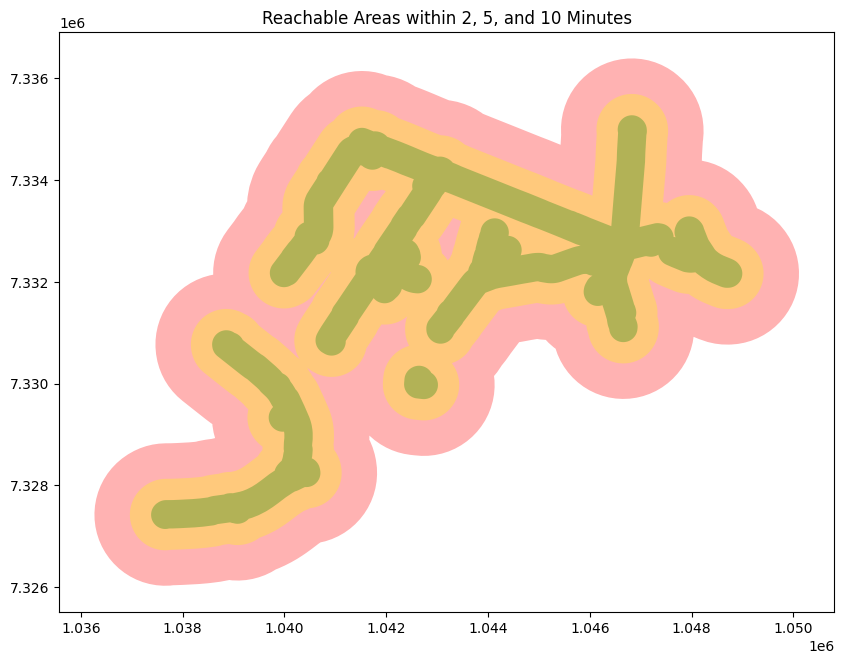

In [55]:
# Assuming t2, t5, t10 are your GeoDataFrames for 2, 5, and 10 minute reach areas
# Make sure they all have the same CRS before plotting

fig, ax = plt.subplots(figsize=(10, 10))
base = t10.plot(ax=ax, color='red', alpha=0.3)  # Less reachable areas in lighter color
t5.plot(ax=base, color='yellow', alpha=0.3)  # More reachable areas with a bit more intensity
t2.plot(ax=base, color='green', alpha=0.3)  # Most reachable areas with the most intensity
# add a basemap layer

plt.title('Reachable Areas within 2, 5, and 10 Minutes')
plt.show()

This visualization is still shit, but anyway.

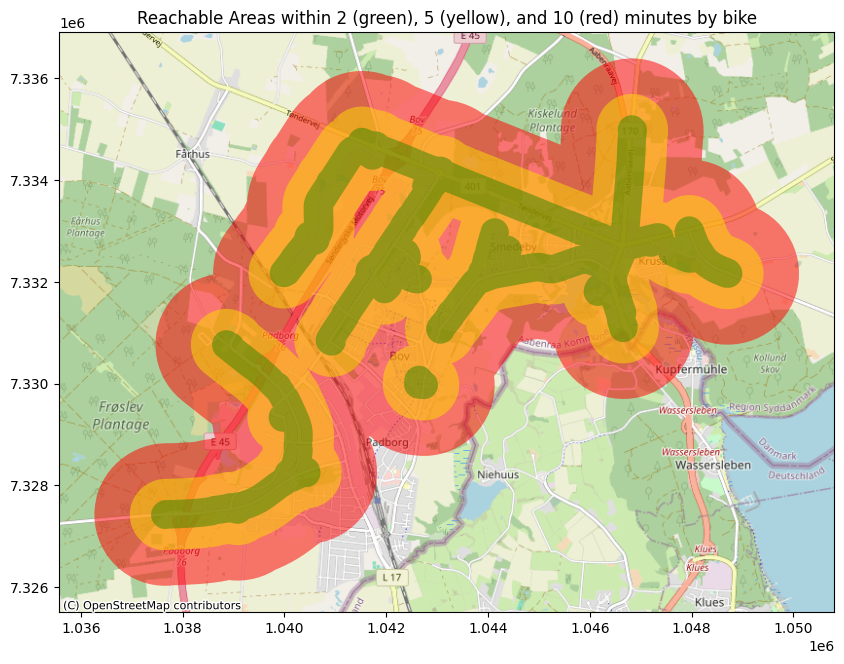

In [58]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# Assuming t2, t5, t10 are your GeoDataFrames for 2, 5, and 10 minute reach areas
# Make sure they all have the same CRS before plotting

fig, ax = plt.subplots(figsize=(10, 10))
base = t10.plot(ax=ax, color='red', alpha=0.3)  # Less reachable areas in lighter color
t5.plot(ax=base, color='yellow', alpha=0.3)  # More reachable areas with a bit more intensity
t2.plot(ax=base, color='green', alpha=0.3)  # Most reachable areas with the most intensity

# Ensure that the data is in EPSG:3857 for the basemap
t10 = t10.to_crs(epsg=3857)
t5 = t5.to_crs(epsg=3857)
t2 = t2.to_crs(epsg=3857)

# Plot the GeoDataFrames again with the new CRS
t10.plot(ax=ax, color='red', alpha=0.3)
t5.plot(ax=ax, color='yellow', alpha=0.3)
t2.plot(ax=ax, color='green', alpha=0.3)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Reachable Areas within 2 (green), 5 (yellow), and 10 (red) minutes by bike')
plt.show()